In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score,roc_auc_score,roc_curve
import seaborn as sns

from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dubai conference/twitter_data.csv")

In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df['labels'] = df['class'].map({0:"Hate speech detected",1:"Offensive language detected",2:"no hate and offesnsive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                          labels  
0  no hate and offesnsive speech  
1    Offensive language detected  
2    Offensive language detected  
3    Offensive language detected  
4    Offensive language detected  


In [ ]:
import re
import string
import nltk  # Import NLTK
from nltk.corpus import stopwords  # Import stopwords module

nltk.download('stopwords')  # Download stopwords if not already present

stopword = set(stopwords.words('english'))  # Initialize stopword as a set

def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|WWW\.\S+','',text)
  text=re.sub('<,*?>*','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split(' ') if word not in stopword]  # Now stopword is defined
  text=" ".join(text)
  return text

df["tweet"]=df["tweet"].apply(clean)
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0   rt mayasolovely woman shouldnt complain clean...   
1   rt  boy dats coldtyga dwn bad cuffin dat hoe ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3           rt cganderson vivabased look like tranny   
4   rt shenikaroberts shit hear might true might ...   

                          labels  
0  no hate and offesnsive speech  
1    Offensive language detected  
2    Offensive language detected  
3    Offensive language detected  
4    Offensive language detected  


In [ ]:
df = df.dropna()  # Removes rows with NaN values


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer
from sklearn.model_selection import train_test_split

x=np.array(df["tweet"])
y=np.array(df["labels"])
cv=CountVectorizer()  # Now you can use CountVectorizer
x=cv.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(clf.predict(X_test))

['Offensive language detected' 'Offensive language detected'
 'Offensive language detected' ... 'no hate and offesnsive speech'
 'Offensive language detected' 'Offensive language detected']


In [ ]:
print(X_train)

  (0, 2493)	1
  (0, 15234)	1
  (0, 24034)	1
  (0, 181)	1
  (1, 2493)	1
  (1, 23343)	1
  (1, 7954)	1
  (1, 26334)	1
  (1, 25356)	1
  (1, 1244)	1
  (1, 10102)	1
  (1, 24254)	1
  (1, 28529)	1
  (2, 22248)	1
  (2, 29687)	1
  (2, 20827)	1
  (2, 28161)	1
  (2, 23621)	1
  (2, 8912)	1
  (2, 23679)	1
  (2, 20630)	1
  (2, 24901)	1
  (2, 2293)	1
  (2, 5793)	1
  (2, 12208)	1
  :	:
  (16600, 19444)	1
  (16600, 29824)	1
  (16600, 3135)	1
  (16600, 7900)	1
  (16601, 20956)	1
  (16601, 10951)	1
  (16601, 20242)	1
  (16601, 763)	2
  (16601, 3328)	1
  (16601, 20316)	1
  (16602, 22248)	1
  (16602, 8835)	1
  (16602, 20827)	1
  (16602, 5557)	1
  (16602, 959)	1
  (16602, 1138)	1
  (16602, 9980)	1
  (16602, 26412)	1
  (16602, 13811)	1
  (16602, 19703)	1
  (16602, 3866)	1
  (16602, 2341)	1
  (16603, 23343)	1
  (16603, 2518)	1
  (16603, 22655)	1


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow import keras
import os



In [ ]:
import datetime
log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D



model = Sequential()
model.add(Embedding(input_dim=200, output_dim=128, input_length=24113))  # Adjust input length
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
l=list(df["tweet"])


In [ ]:
rows_as_list = df.values.tolist()

print(rows_as_list)


[[0, 3, 0, 0, 3, 2, ' rt mayasolovely woman shouldnt complain cleaning house amp man always take trash', 'no hate and offesnsive speech'], [1, 3, 0, 3, 0, 1, ' rt  boy dats coldtyga dwn bad cuffin dat hoe  place', 'Offensive language detected'], [2, 3, 0, 3, 0, 1, ' rt urkindofbrand dawg rt  ever fuck bitch start cry confused shit', 'Offensive language detected'], [3, 3, 0, 2, 1, 1, ' rt cganderson vivabased look like tranny', 'Offensive language detected'], [4, 6, 0, 6, 0, 1, ' rt shenikaroberts shit hear might true might faker bitch told ya ', 'Offensive language detected'], [5, 3, 1, 2, 0, 1, 'tmadisonx shit blows meclaim faithful somebody still fucking hoes ', 'Offensive language detected'], [6, 3, 0, 3, 0, 1, 'brighterdays sit hate another bitch  got much shit going', 'Offensive language detected'], [7, 3, 0, 3, 0, 1, ' cause im tired big bitches coming us skinny ', 'Offensive language detected'], [8, 3, 0, 3, 0, 1, ' amp might get ya bitch back amp thats ', 'Offensive language de

In [ ]:
column_index = 5  # Index of the column you want to extract
column_list = []
for i in range(0,len(rows_as_list)):
  column_list.append(rows_as_list[i][5])

print(column_list.count(1))

19190


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Sample dataset (replace with your data)
texts = l  # List of tweets
labels = column_list
# 0 for "hate_speech," 1 for "offensive_language," 2 for "neither"

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)  # Adjust vocabulary size as needed
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = 100  # Adjust as needed
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert labels to one-hot encoding
num_classes = 3  # Three classes: "hate_speech," "offensive_language," "neither"
labels = tf.keras.utils.to_categorical(labels, num_classes)

# Define the LSTM model with additional layers
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))  # First LSTM layer with return_sequences=True to stack another LSTM
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(LSTM(64))  # Second LSTM layer
model.add(Dense(64, activation='relu'))  # Fully connected layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (split your dataset into training and testing sets)
his = model.fit(sequences, labels, validation_split=0.2, epochs=5, batch_size=64)  # Adjust hyperparameters


Epoch 1/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 144s 438ms/step - accuracy: 0.7871 - loss: 0.6135 - val_accuracy: 0.8999 - val_loss: 0.3016
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 136s 418ms/step - accuracy: 0.9001 - loss: 0.3061 - val_accuracy: 0.9009 - val_loss: 0.3056
Epoch 3/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 130s 419ms/step - accuracy: 0.9145 - loss: 0.2609 - val_accuracy: 0.9034 - val_loss: 0.2892
Epoch 4/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 161s 480ms/step - accuracy: 0.9232 - loss: 0.2175 - val_accuracy: 0.8981 - val_loss: 0.3058
Epoch 5/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 132s 424ms/step - accuracy: 0.9398 - loss: 0.1767 - val_accuracy: 0.9022 - val_loss: 0.3352


In [ ]:
h=his.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

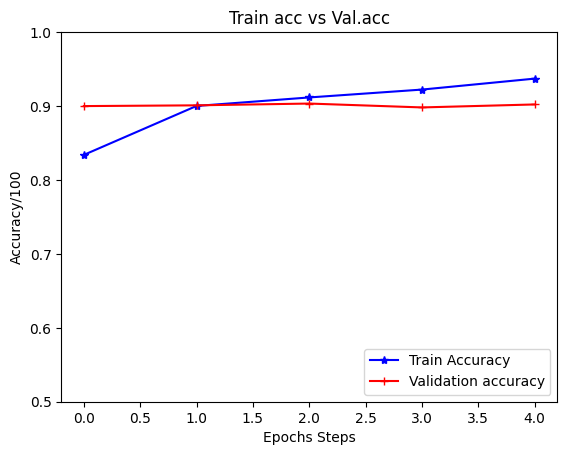

In [ ]:
l1,=plt.plot(h['accuracy'],c="blue",marker='*')
l2,=plt.plot(h['val_accuracy'],c="red",marker='+')
plt.legend((l1,l2),["Train Accuracy","Validation accuracy",],loc="lower right")
plt.xlabel('Epochs Steps')
plt.ylabel('Accuracy/100')
plt.title("Train acc vs Val.acc")
plt.ylim(0.5,1.00)
plt.show()

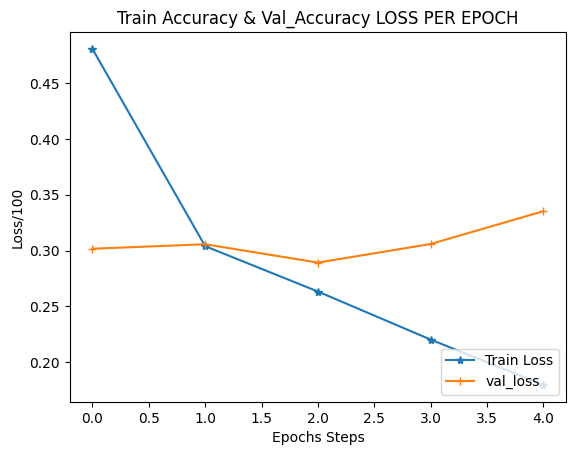

In [ ]:
l1,=plt.plot(h['loss'],marker='*')
l2,=plt.plot(h['val_loss'],marker='+')
plt.legend((l1,l2),["Train Loss","val_loss"],loc="lower right")
# plt.legend(["LOSS"],loc="lower righ/8t")
plt.xlabel('Epochs Steps')
plt.ylabel('Loss/100')
plt.title("Train Accuracy & Val_Accuracy LOSS PER EPOCH")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = model.predict(X_test[0:30])
y_pred = y_pred_probs.argmax(axis=1)

# Assuming 'labels' is a list of your class names in the correct order
y_pred_labels = [labels[i] for i in y_pred]  # Convert predicted indices to labels

# Confusion Matrix
 # Use string labels for both

1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step


In [ ]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_test
list_y_test = y_test.tolist()


In [ ]:
print(list_y_test[0],'\n',list_y_test[1],'\n',list_y_test[2])

Offensive language detected 
 Offensive language detected 
 no hate and offesnsive speech


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit the encoder to the text labels and transform them into numerical values
numerical_labels_encoded = label_encoder.fit_transform(list_y_test
                                                       )
numerical_labels_encoded_list=list(numerical_labels_encoded)
print(numerical_labels_encoded_list[:30])

[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import auc, precision_recall_curve

print(f"Accuracy Score: {accuracy_score(y_pred, numerical_labels_encoded_list[:30]) * 100:.2f}%")
print("Precision Score: ",precision_score(y_pred, numerical_labels_encoded_list[:30], average='weighted')*100,"%")
print("recall Score: ",recall_score(y_pred, numerical_labels_encoded_list[:30], average='weighted')*100,"%")
print("F1 Score: ",f1_score(y_pred, numerical_labels_encoded_list[:30], average='weighted')*100,"%")




Accuracy Score: 83.33%
Precision Score:  100.0 %
recall Score:  83.33333333333334 %
F1 Score:  90.9090909090909 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Score: 100.00%
Recall Score: 83.33%
F1 Score: 90.91%


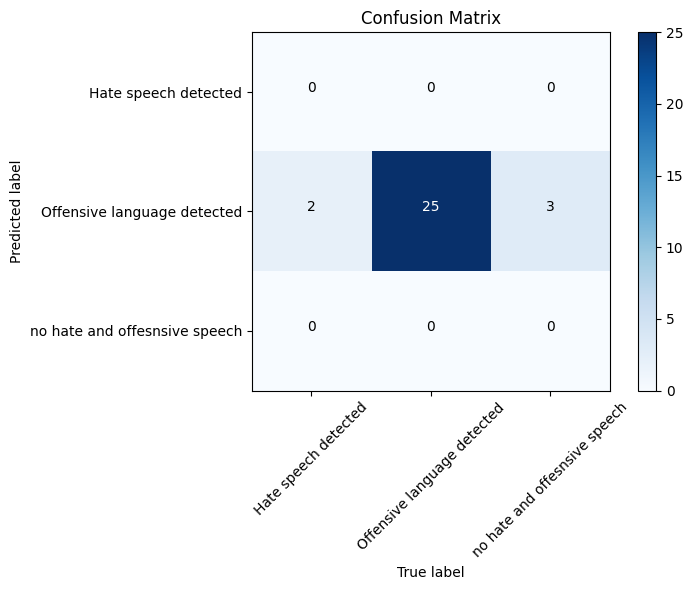

In [ ]:
precision = precision_score(y_pred, numerical_labels_encoded_list[0:30], average='weighted') * 100
recall = recall_score(y_pred, numerical_labels_encoded_list[0:30], average='weighted') * 100
f1 = f1_score(y_pred, numerical_labels_encoded_list[0:30], average='weighted') * 100

print(f"Precision Score: {precision:.2f}%")
print(f"Recall Score: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_pred, numerical_labels_encoded_list[0:30])

# Convert to DataFrame for better visualization

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
class_names =['Hate speech detected', 'Offensive language detected', 'no hate and offesnsive speech']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Annotate the matrix with the counts
thresh = conf_matrix.max() / 2.0
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.tight_layout()
plt.show()